In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os 
import random
random.seed(9001)
from albumentations import (
    HorizontalFlip, ShiftScaleRotate, CLAHE, RandomRotate90,
    Transpose, ShiftScaleRotate, Blur, OpticalDistortion, GridDistortion, HueSaturationValue,
 RandomBrightnessContrast, IAASharpen, Flip, OneOf, Compose, RandomContrast, RandomScale, VerticalFlip,HorizontalFlip
)
from load_tools import *

In [4]:
positives_path = '/datagrid/temporary/dobkomar/output_path_32/1/'

all_files_pos = [f for f in os.listdir(positives_path) if os.path.isfile(os.path.join(positives_path,f))]

In [5]:
# Divide train, validation

train, val = all_files_pos[:1000], all_files_pos[1000:]
len(train), len(val)

(1000, 557)

In [6]:
X_train, X_val = [], []
for i in range(len(train)):
    im = np.load(positives_path + train[i])  #[16, :, :]
    if np.mean(i) >1:   
        X_train.append(im)
for i in range(len(val)):
    im=np.load(positives_path + val[i])  # [16, :, :]
    if np.mean(i) >1:
        X_val.append(im)

In [7]:
len(X_train), len(X_val)

(998, 555)

## Initialize augmentator

In [8]:
augm = Compose([
        RandomRotate90(),
        Transpose(),
#         ShiftScaleRotate(shift_limit=0.0, scale_limit=0.50, rotate_limit=0, border_mode=cv2.BORDER_CONSTANT, p=.75),
        RandomBrightnessContrast(brightness_limit=0.4, contrast_limit=0.4, p=0.8),
    VerticalFlip(p=0.7),HorizontalFlip(p=0.7),
        RandomScale(scale_limit=0.3)
    ])

In [9]:
augm_save_path = '/datagrid/temporary/dobkomar/output_path_32/augmented/'
num_aug_iterations = 21

for el in range(len(train_data)):
    for r in range(num_aug_iterations):
        image_ = augm(image=train_data[el].astype(np.uint8))['image']
        if image_.shape[0] != 32:
            image_ = cropND(image_, (32, 32, 32))
        np.save(augm_save_path +'train/' +str(el) + '_' + str(r) + '.npy',image_)

for el_val in range(len(val_data)):
    for r in range(num_aug_iterations):
        image_ = augm(image=val_data[el_val].astype(np.uint8))['image']
        if image_.shape[0] != 32:
            image_ = cropND(image_, (32, 32, 32))
        np.save(augm_save_path +'val/'+ str(el_val) + '_' + str(r) + '.npy',image_)

## Visualize augmented data

In [21]:
augm_save_path =  '/datagrid/temporary/dobkomar/output_path_32/myaug_15/' 
files_train = [f for f in os.listdir(augm_save_path+'train/')]
files_val = [f for f in os.listdir(augm_save_path+'val/')]

In [29]:
# LOAD SOME IMAGES
images_train, images_val = [], []

for i in files_train[:50]:
    im = np.load(augm_save_path+'train/'+i)
    if im.shape[0] == 32:
        images_train.append(im[16, :, :])
    
for i in files_val[:50]:
    im = np.load(augm_save_path+'val/'+i)
    if im.shape[0] == 32:
        images_val.append(im[16, :, :])

In [30]:
images_train[5].shape

(32, 32)

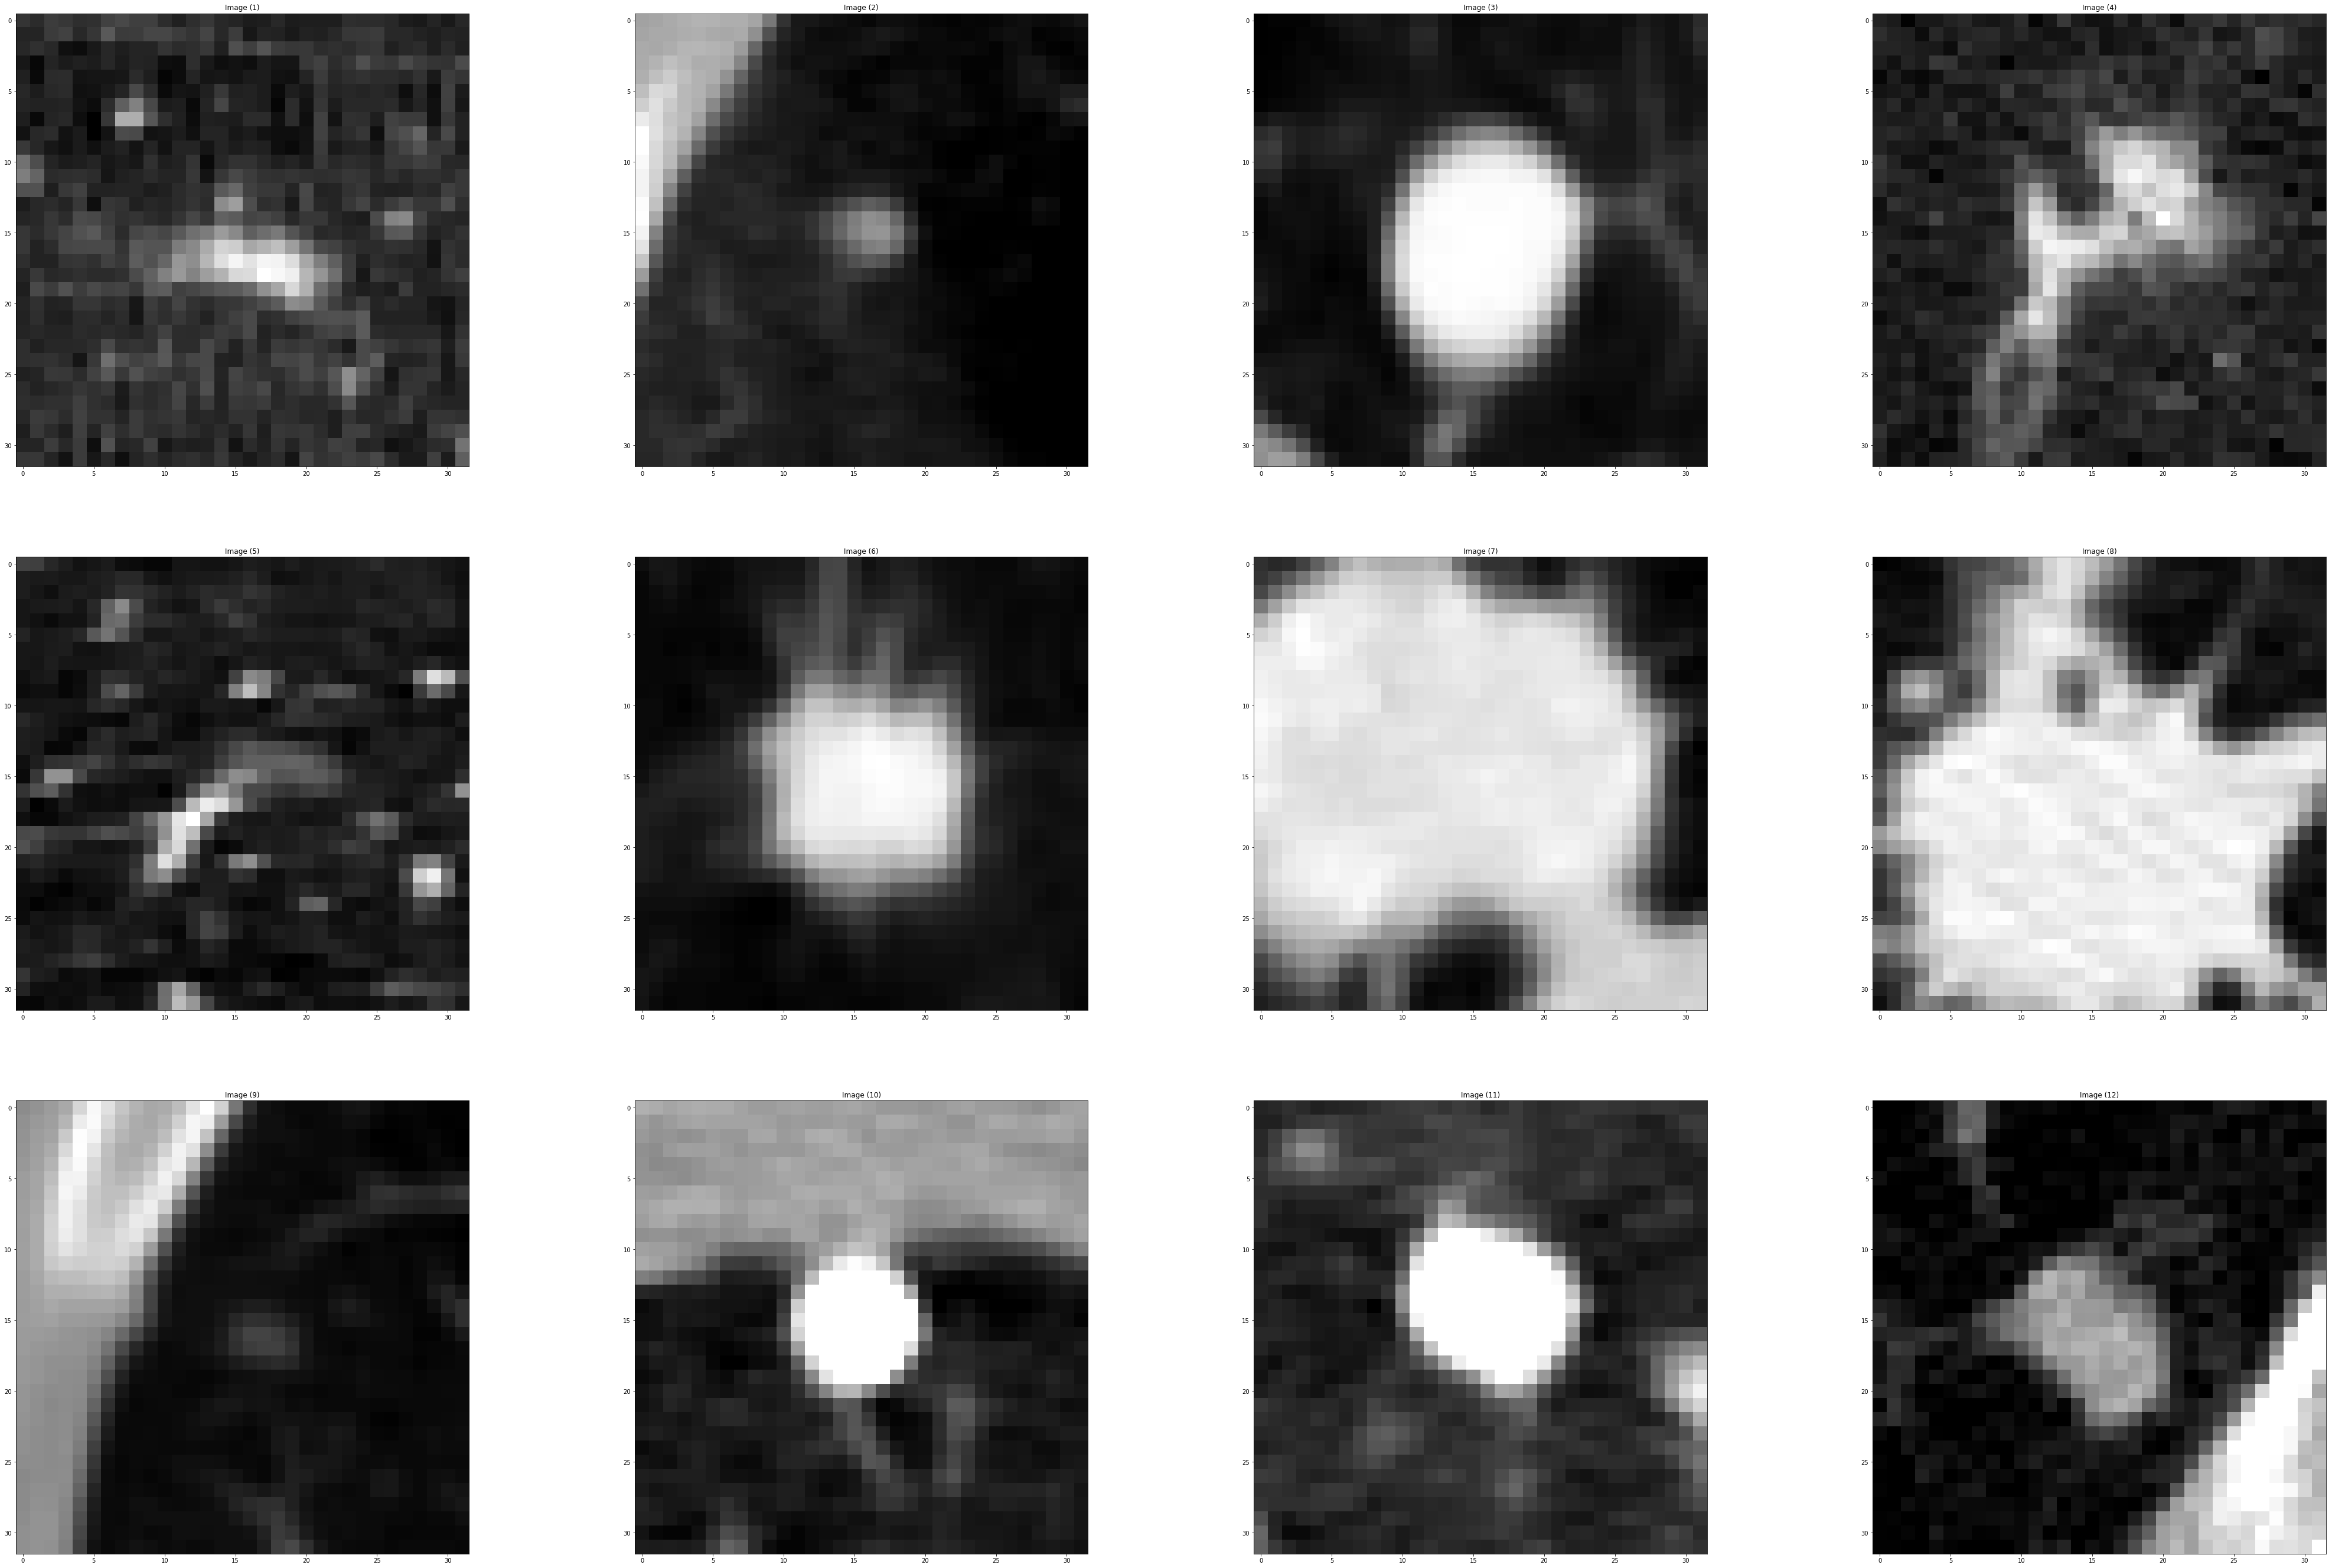

In [31]:
show_images(images_train[:12], 3)